# Joining Data with pandas
Run the hidden code cell below to import a few of the datasets used in this course.

_Note: There are a large number of datasets in the `datasets/` folder. Many of these are Pickle files, which you can read using `pd.read_pickle(path_to_file)`. An example is included in the cell below._

In [1]:
# Import pandas
import pandas as pd

# Import some of the course datasets 
taxi_owners = pd.read_pickle("datasets/taxi_owners.p")
taxi_vehicles = pd.read_pickle("datasets/taxi_vehicles.p")

# Preview one of the DataFrames
taxi_owners

rid   vid             owner                 address    zip
0     T6285  6285    AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1     T4862  4862      MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2     T1495  1495     FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3     T4231  4231      ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4     T5971  5971    EUNIFFORD INC.     3351 W. ADDISON ST.  60618
...     ...   ...               ...                     ...    ...
3514  T4453  4453   IMAGIN CAB CORP     3351 W. ADDISON ST.  60618
3515   T121   121  TRIBECA CAB CORP     4536 N. ELSTON AVE.  60630
3516  T3465  3465  AMIR EXPRESS INC     3351 W. ADDISON ST.  60618
3517  T1962  1962  KARY CAB COMPANY     4707 N. KENTON AVE.  60630
3518  T1031  1031       NECT 42 LLC    6500 N. WESTERN AVE.  60645

[3519 rows x 5 columns]

In [2]:
taxi_vehicles

vid     make    model  year  fuel_type                owner
0     2767   TOYOTA    CAMRY  2013     HYBRID       SEYED M. BADRI
1     1411   TOYOTA     RAV4  2017     HYBRID          DESZY CORP.
2     6500   NISSAN   SENTRA  2019   GASOLINE       AGAPH CAB CORP
3     2746   TOYOTA    CAMRY  2013     HYBRID  MIDWEST CAB CO, INC
4     5922   TOYOTA    CAMRY  2013     HYBRID       SUMETTI CAB CO
...    ...      ...      ...   ...        ...                  ...
3514  5902   TOYOTA    CAMRY  2013     HYBRID            SAFAR INC
3515  1407  HYUNDAI  ELANTRA  2018   GASOLINE    MYKONOS CAB CORP.
3516   854   TOYOTA    CAMRY  2012     HYBRID      JOELIZ CORP INC
3517  6274   TOYOTA    CAMRY  2012     HYBRID          A K O S INC
3518  4675     FORD   ESCAPE  2011  FLEX FUEL           MAJAZ CORP

[3519 rows x 6 columns]

## Take Notes

Add notes here about the concepts you've learned and code cells with code you want to keep.

_Add your notes here_

In [3]:
# Joining Data
taxi_own_veh = taxi_owners.merge(taxi_vehicles, on = 'vid')

In [4]:
taxi_own_veh

rid   vid           owner_x  ...  year fuel_type           owner_y
0     T6285  6285    AGEAN TAXI LLC  ...  2011    HYBRID    AGEAN TAXI LLC
1     T4862  4862      MANGIB CORP.  ...  2014  GASOLINE      MANGIB CORP.
2     T1495  1495     FUNRIDE, INC.  ...  2015  GASOLINE     FUNRIDE, INC.
3     T4231  4231      ALQUSH CORP.  ...  2014    HYBRID      ALQUSH CORP.
4     T5971  5971    EUNIFFORD INC.  ...  2015  GASOLINE    EUNIFFORD INC.
...     ...   ...               ...  ...   ...       ...               ...
3514  T4453  4453   IMAGIN CAB CORP  ...  2010    HYBRID   IMAGIN CAB CORP
3515   T121   121  TRIBECA CAB CORP  ...  2014    HYBRID  TRIBECA CAB CORP
3516  T3465  3465  AMIR EXPRESS INC  ...  2014    HYBRID  AMIR EXPRESS INC
3517  T1962  1962  KARY CAB COMPANY  ...  2014    HYBRID  KARY CAB COMPANY
3518  T1031  1031       NECT 42 LLC  ...  2014    HYBRID       NECT 42 LLC

[3519 rows x 10 columns]

In [5]:
# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [6]:
# Print the shape of taxi_onw_veh
print('taxi_onw_veh shape:',taxi_own_veh.shape)
print('taxi_onw:',taxi_owners.shape)

# One-to-one example

taxi_onw_veh shape: (3519, 10)
taxi_onw: (3519, 5)


In [7]:
taxi_own_veh = taxi_owners.merge(taxi_vehicles, on = ['vid','owner'],suffixes= ('_own','_veh'))

In [8]:
taxi_own_veh

rid   vid             owner  ...   model  year fuel_type
0     T6285  6285    AGEAN TAXI LLC  ...  ALTIMA  2011    HYBRID
1     T4862  4862      MANGIB CORP.  ...     CRV  2014  GASOLINE
2     T1495  1495     FUNRIDE, INC.  ...  SIENNA  2015  GASOLINE
3     T4231  4231      ALQUSH CORP.  ...   CAMRY  2014    HYBRID
4     T5971  5971    EUNIFFORD INC.  ...  SIENNA  2015  GASOLINE
...     ...   ...               ...  ...     ...   ...       ...
3514  T4453  4453   IMAGIN CAB CORP  ...  ESCAPE  2010    HYBRID
3515   T121   121  TRIBECA CAB CORP  ...   C-MAX  2014    HYBRID
3516  T3465  3465  AMIR EXPRESS INC  ...   CAMRY  2014    HYBRID
3517  T1962  1962  KARY CAB COMPANY  ...   CAMRY  2014    HYBRID
3518  T1031  1031       NECT 42 LLC  ...  FUSION  2014    HYBRID

[3519 rows x 9 columns]

In [9]:
taxi_own_veh.shape

(3519, 9)

In [11]:
# Group the results by make then count the number of owners
counted_df = taxi_own_veh.groupby('make').agg({'owner':'count'})


# Sort the counted_df in desending order
counted_df_sort = counted_df.sort_values(by='owner',ascending = False); display(counted_df_sort)


owner
make            
TOYOTA      2736
FORD         430
NISSAN       108
DODGE        100
VPG           50
HYUNDAI       46
KIA           23
CHEVROLET     10
HONDA          8
MAZDA          2
SCION          2
CHRYSLER       1
LINCOLN        1
MERCURY        1
SUBARU         1

In [12]:
movie_to_genres = pd.read_pickle("datasets/movie_to_genres.p")
movies = pd.read_pickle("datasets/movies.p")
ratings = pd.read_pickle("datasets/ratings.p")

In [13]:
movie_to_genres.columns

Index(['movie_id', 'genre'], dtype='object')

In [14]:
# Rename columns

movie_to_genres.rename(columns={'movie_id':'id'},inplace=True)

In [15]:
print(movies.columns)


Index(['id', 'title', 'popularity', 'release_date'], dtype='object')


In [16]:
ratings.columns

Index(['id', 'vote_average', 'vote_count'], dtype='object')

In [17]:
movie_rating = movies.merge(ratings,on = 'id')

In [18]:
movie_genre_rating = movies.merge(movie_to_genres,on = 'id')\
.merge(ratings, on = 'id')
                        

In [19]:
movie_genre_rating

id                 title  ...  vote_average vote_count
0        257          Oliver Twist  ...           6.7      274.0
1        257          Oliver Twist  ...           6.7      274.0
2        257          Oliver Twist  ...           6.7      274.0
3      14290  Better Luck Tomorrow  ...           6.5       27.0
4      14290  Better Luck Tomorrow  ...           6.5       27.0
...      ...                   ...  ...           ...        ...
12155  13807                Exiled  ...           7.0       46.0
12156  13807                Exiled  ...           7.0       46.0
12157  73873          Albert Nobbs  ...           6.2      132.0
12158  11622   Blast from the Past  ...           6.3      245.0
12159  11622   Blast from the Past  ...           6.3      245.0

[12160 rows x 7 columns]

In [20]:
# Print the shape of movie_genre_rating
print('movies shape:',movies.shape)
print('Rating shape:',movie_rating.shape)
print('movie_genre_rating shape:',movie_genre_rating.shape)

# One-to-many example

movies shape: (4803, 4)
Rating shape: (4803, 6)
movie_genre_rating shape: (12160, 7)


<AxesSubplot: xlabel='genre'>

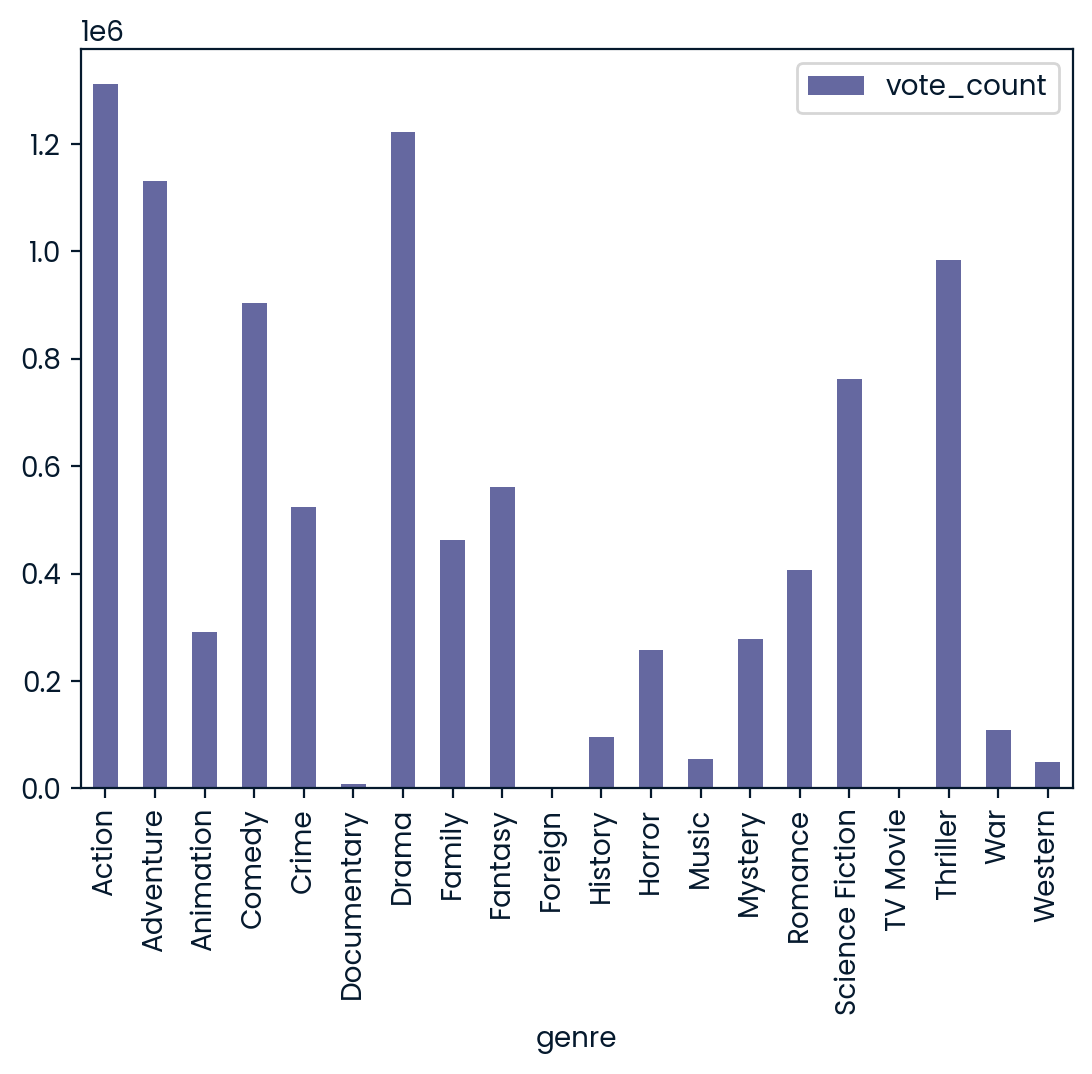

In [21]:
import matplotlib as plt

movie_genre_rating.groupby('genre').sum().plot(kind = 'bar',y='vote_count')

In [22]:
cal = pd.read_pickle("datasets/cta_calendar.p")
ridership = pd.read_pickle("datasets/cta_ridership.p")
stations = pd.read_pickle("datasets/stations.p")

In [23]:
cal.columns

Index(['year', 'month', 'day', 'day_type'], dtype='object')

In [24]:
ridership.columns

Index(['station_id', 'year', 'month', 'day', 'rides'], dtype='object')

In [25]:
stations.columns

Index(['station_id', 'station_name', 'location'], dtype='object')

In [26]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal,on=['year','month','day'])

print(ridership_cal.shape)
print(ridership.shape)
print(cal.shape)

(3285, 6)
(3285, 5)
(365, 4)


In [27]:
ridership_cal

station_id  year  month  day  rides        day_type
0         40010  2019      1    1    576  Sunday/Holiday
1         40080  2019      1    1   1839  Sunday/Holiday
2         40770  2019      1    1   2724  Sunday/Holiday
3         40120  2019      1    1    754  Sunday/Holiday
4         40540  2019      1    1   2175  Sunday/Holiday
...         ...   ...    ...  ...    ...             ...
3280      40540  2019     12   31   4355         Weekday
3281      41260  2019     12   31   1228         Weekday
3282      41500  2019     12   31   1685         Weekday
3283      41440  2019     12   31   1370         Weekday
3284      41660  2019     12   31  13430         Weekday

[3285 rows x 6 columns]

In [28]:
ridership_cal_station = ridership_cal.merge(stations,on = 'station_id')

print(ridership_cal_station.shape)

(3285, 8)


In [29]:
display(ridership_cal_station)

station_id  year  ...        station_name                 location
0         40010  2019  ...  Austin-Forest Park  (41.870851, -87.776812)
1         40010  2019  ...  Austin-Forest Park  (41.870851, -87.776812)
2         40010  2019  ...  Austin-Forest Park  (41.870851, -87.776812)
3         40010  2019  ...  Austin-Forest Park  (41.870851, -87.776812)
4         40010  2019  ...  Austin-Forest Park  (41.870851, -87.776812)
...         ...   ...  ...                 ...                      ...
3280      41660  2019  ...          Lake/State  (41.884809, -87.627813)
3281      41660  2019  ...          Lake/State  (41.884809, -87.627813)
3282      41660  2019  ...          Lake/State  (41.884809, -87.627813)
3283      41660  2019  ...          Lake/State  (41.884809, -87.627813)
3284      41660  2019  ...          Lake/State  (41.884809, -87.627813)

[3285 rows x 8 columns]

In [30]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_station['month'] == 7) 
                   & (ridership_cal_station['day_type'] == "Weekday") 
                   & (ridership_cal_station['station_name'] == "Wilson"))

In [31]:
# Use .loc and the filter to select for rides
print("Total number of trips offered to passengers passing through Wilson station :",ridership_cal_station.loc[filter_criteria, 'rides'].sum())

Total number of trips offered to passengers passing through Wilson station : 140005


# Left Join

In [60]:
movies = pd.read_pickle("datasets/movies.p")
financials = pd.read_pickle("datasets/financials.p")
taglines = pd.read_pickle("datasets/taglines.p")
movie_to_genres = pd.read_pickle("datasets/movie_to_genres.p")

In [33]:
movies_finan = movies.merge(financials,on='id',how='left')

In [34]:
print('empty values on budget column:',movies_finan['budget'].isnull().sum())

empty values on budget column: 1574


In [35]:
movies_tag_left = movies.merge(taglines,on='id',how='left')
movies_tag_inner = movies.merge(taglines,on='id')

In [36]:
#A left join will do this by returning all rows from your left table, while using an inner join can result in lost data if it doesn't exist in both tables.

print('Inner join:',movies_tag_inner.shape)
print('Inner left:',movies_tag_left.shape)

Inner join: (3955, 5)
Inner left: (4803, 5)


# Right Join

In [37]:
movie_to_genres.columns

Index(['movie_id', 'genre'], dtype='object')

In [38]:
movies.columns

Index(['id', 'title', 'popularity', 'release_date'], dtype='object')

In [39]:
crime_movie = movie_to_genres[movie_to_genres['genre'] == 'Crime']
comedy_movie = movie_to_genres[movie_to_genres['genre'] == 'Comedy']

In [40]:
crime_comedy = comedy_movie.merge(crime_movie,on='movie_id',how='right',suffixes=['_comedy','_crime'])

In [41]:
crime_comedy

movie_id genre_comedy genre_crime
0           5       Comedy       Crime
1          16          NaN       Crime
2          24          NaN       Crime
3          59          NaN       Crime
4          66          NaN       Crime
..        ...          ...         ...
691    366967          NaN       Crime
692    370464          NaN       Crime
693    376004          NaN       Crime
694    378237          NaN       Crime
695    389425          NaN       Crime

[696 rows x 3 columns]

In [42]:
movie_crime_comedy = movies.merge(crime_comedy,how='right',left_on='id',right_on='movie_id')

In [43]:
movie_crime_comedy

id                     title  ...  genre_comedy genre_crime
0         5                Four Rooms  ...        Comedy       Crime
1        16        Dancer in the Dark  ...           NaN       Crime
2        24         Kill Bill: Vol. 1  ...           NaN       Crime
3        59     A History of Violence  ...           NaN       Crime
4        66            Absolute Power  ...           NaN       Crime
..      ...                       ...  ...           ...         ...
691  366967               Dutch Kills  ...           NaN       Crime
692  370464          The Masked Saint  ...           NaN       Crime
693  376004                Adulterers  ...           NaN       Crime
694  378237  Amidst the Devil's Wings  ...           NaN       Crime
695  389425             Code of Honor  ...           NaN       Crime

[696 rows x 7 columns]

In [44]:
movie_crime_comedy_only = movie_crime_comedy[movie_crime_comedy['genre_comedy'].isnull() == False ]

In [45]:
movie_crime_comedy_only

id                                title  ...  genre_comedy genre_crime
0         5                           Four Rooms  ...        Comedy       Crime
5        90                    Beverly Hills Cop  ...        Comedy       Crime
6        96                 Beverly Hills Cop II  ...        Comedy       Crime
7       100  Lock, Stock and Two Smoking Barrels  ...        Comedy       Crime
11      115                     The Big Lebowski  ...        Comedy       Crime
..      ...                                  ...  ...           ...         ...
655  256092                           Drive Hard  ...        Comedy       Crime
656  256591                                Focus  ...        Comedy       Crime
664  268920                          Hot Pursuit  ...        Comedy       Crime
674  291805                     Now You See Me 2  ...        Comedy       Crime
676  308639                                 Dope  ...        Comedy       Crime

[180 rows x 7 columns]

# Outer Join

In [46]:
actor_movies = pd.read_pickle("datasets/casts.p")
display(actor_movies)

movie_id  cast_id character  gender       id               name
7          5       22   Jezebel       1     3122        Sammi Davis
8          5       23     Diana       1     3123  Amanda de Cadenet
9          5       24    Athena       1     3124     Valeria Golino
3          5       25   Elspeth       1     3125            Madonna
12         5       26       Eva       1     3126          Ione Skye
..       ...      ...       ...     ...      ...                ...
0     433715        3     Amber       0  1500111      Nicole Smolen
1     433715        4        BB       0  1734573        Kim Baldwin
2     433715        5     Sugar       0  1734574    Ariana Stephens
3     433715        6      Drew       0  1734575        Bryson Funk
0     459488        0  Narrator       0  1354401    Tony Oppedisano

[106257 rows x 6 columns]

In [47]:
iron_man_1 = actor_movies[actor_movies['movie_id'] == 1726]
iron_man_2 = actor_movies[actor_movies['movie_id'] == 10138]

In [48]:
# Using an outer join, you were able to select only those lines where the actor acted in only one of the two films

iron_1_and_2 = iron_man_1.merge(iron_man_2,how='outer',on='id',suffixes=['_1','_2'])

In [49]:
iron_1_and_2

movie_id_1  cast_id_1  ... gender_2                  name_2
0        1726.0        9.0  ...      NaN                     NaN
1        1726.0       10.0  ...      1.0         Gwyneth Paltrow
2        1726.0       11.0  ...      NaN                     NaN
3        1726.0       12.0  ...      NaN                     NaN
4        1726.0       17.0  ...      1.0             Leslie Bibb
..          ...        ...  ...      ...                     ...
186         NaN        NaN  ...      2.0            Doug Swander
187         NaN        NaN  ...      0.0    Michael A. Templeton
188         NaN        NaN  ...      0.0             Rosa Tyabji
189         NaN        NaN  ...      0.0  Peter Sebastian Wrobel
190         NaN        NaN  ...      1.0          Maria Zambrana

[191 rows x 11 columns]

In [50]:
iron_1_and_2 = iron_1_and_2[['character_1','id','name_1','character_2','name_2']]

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()== True) | 
     (iron_1_and_2['name_2'].isnull()==True))

# Print the first few rows of iron_1_and_2
display(iron_1_and_2[m].head())

character_1      id  ... character_2 name_2
0                                        Yinsen   17857  ...         NaN    NaN
2                   Obadiah Stane / Iron Monger    1229  ...         NaN    NaN
3  Lt. Col. James "Rhodey" Rhodes / War Machine   18288  ...         NaN    NaN
5                                          Raza   57452  ...         NaN    NaN
8                                    Abu Bakaar  173810  ...         NaN    NaN

[5 rows x 5 columns]

# Merging a Table to itself

In [51]:
crews = pd.read_pickle('datasets/crews.p')

In [52]:
crews.columns

Index(['id', 'department', 'job', 'name'], dtype='object')

In [53]:
crews_merge_itself = crews.merge(crews, on='id',how='inner',suffixes=['_dir','_crew'])

In [54]:
boolean_filter = ((crews_merge_itself['job_dir']=='Director')&
                 (crews_merge_itself['job_crew'] != 'Director'))

In [55]:
crews_merge_itself[boolean_filter]

id department_dir  ...            job_crew          name_crew
156      19995      Directing  ...              Editor  Stephen E. Rivkin
157      19995      Directing  ...      Sound Designer  Christopher Boyes
158      19995      Directing  ...             Casting          Mali Finn
160      19995      Directing  ...              Writer      James Cameron
161      19995      Directing  ...        Set Designer    Richard F. Mays
...        ...            ...  ...                 ...                ...
834166   72766      Directing  ...              Editor       Janet Gaynor
834174  231617      Directing  ...  Executive Producer        Scott Smith
834182   25975      Directing  ...  Executive Producer     Clark Peterson
834186   25975      Directing  ...  Executive Producer     Clark Peterson
834190   25975      Directing  ...  Executive Producer     Clark Peterson

[40845 rows x 7 columns]